In [1]:
#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
import scipy.io as io
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet

In [41]:
t = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690,720,750,780,810,840,870,900,930,960,990,1020,1050,1080,1110,1140,1170,1200,1230,1260,1290,1320,1350,1380,1410,1440,1470,1500,1530,1560,1590,1620,1650,1680,1710,1740,1770]

theta_1 = [0.000044,0.00418,0.007613,0.009688,0.011724,0.013292,0.014861,0.016068,0.016794,0.017864,0.018683,0.019505,0.019694,0.020521,0.020948,0.021376,0.021421,0.022042,0.022214,0.022362,0.022471,0.022721,0.022323,0.023356,0.023182,0.023681,0.023328,0.023535,0.023762,0.023704,0.023386,0.023756,0.024219,0.024057,0.024156,0.023427,0.024523,0.023883,0.024268,0.024381,0.02441,0.023995,0.024261,0.024189,0.024462,0.024091,0.024583,0.023725,0.024293,0.024334,0.02434,0.024193,0.024429,0.024505,0.02408,0.024476,0.024522,0.024816,0.024123,0.024854]
theta_2 = [0.000076,0.00477,0.008326,0.011429,0.013738,0.015442,0.016755,0.017659,0.018768,0.019738,0.020035,0.020567,0.021686,0.021304,0.022313,0.022557,0.02238,0.022371,0.022864,0.023339,0.023126,0.023449,0.023514,0.024181,0.023862,0.024386,0.023932,0.024192,0.024133,0.023938,0.024386,0.024504,0.024537,0.023851,0.024333,0.024012,0.024298,0.024572,0.024214,0.024412,0.02457,0.024637,0.024549,0.024425,0.024582,0.02426,0.024943,0.024291,0.02448,0.024237,0.02461,0.024416,0.024168,0.0244,0.024407,0.024623,0.024262,0.024701,0.024374,0.024273]
theta_3 = [0.000062,0.008054,0.013396,0.015942,0.018504,0.02002,0.021202,0.021734,0.022336,0.023086,0.023007,0.023767,0.023549,0.023729,0.023631,0.024048,0.02379,0.024108,0.02406,0.024182,0.024427,0.024168,0.024878,0.024163,0.024634,0.024397,0.024444,0.024658,0.024698,0.024673,0.024546,0.024967,0.024694,0.024733,0.024163,0.024341,0.024377,0.023989,0.024388,0.024325,0.024658,0.024315,0.024266,0.025006,0.024375,0.024721,0.02442,0.023821,0.024614,0.024363,0.024427,0.024572,0.024613,0.02474,0.024874,0.024002,0.024468,0.024603,0.024351,0.024235]

#---------------------------------- smooth a graph
def Smooth_Graph(x,window_len=10,window='hanning'):
    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')
    y=numpy.convolve(w/w.sum(),s,mode='valid')
    
    return y

theta_1_smooth = Smooth_Graph(theta_1)
theta_1_smooth[4]=0
theta_2_smooth = Smooth_Graph(theta_2)
theta_2_smooth[4]=0
theta_3_smooth = Smooth_Graph(theta_3)
theta_3_smooth[4]=0

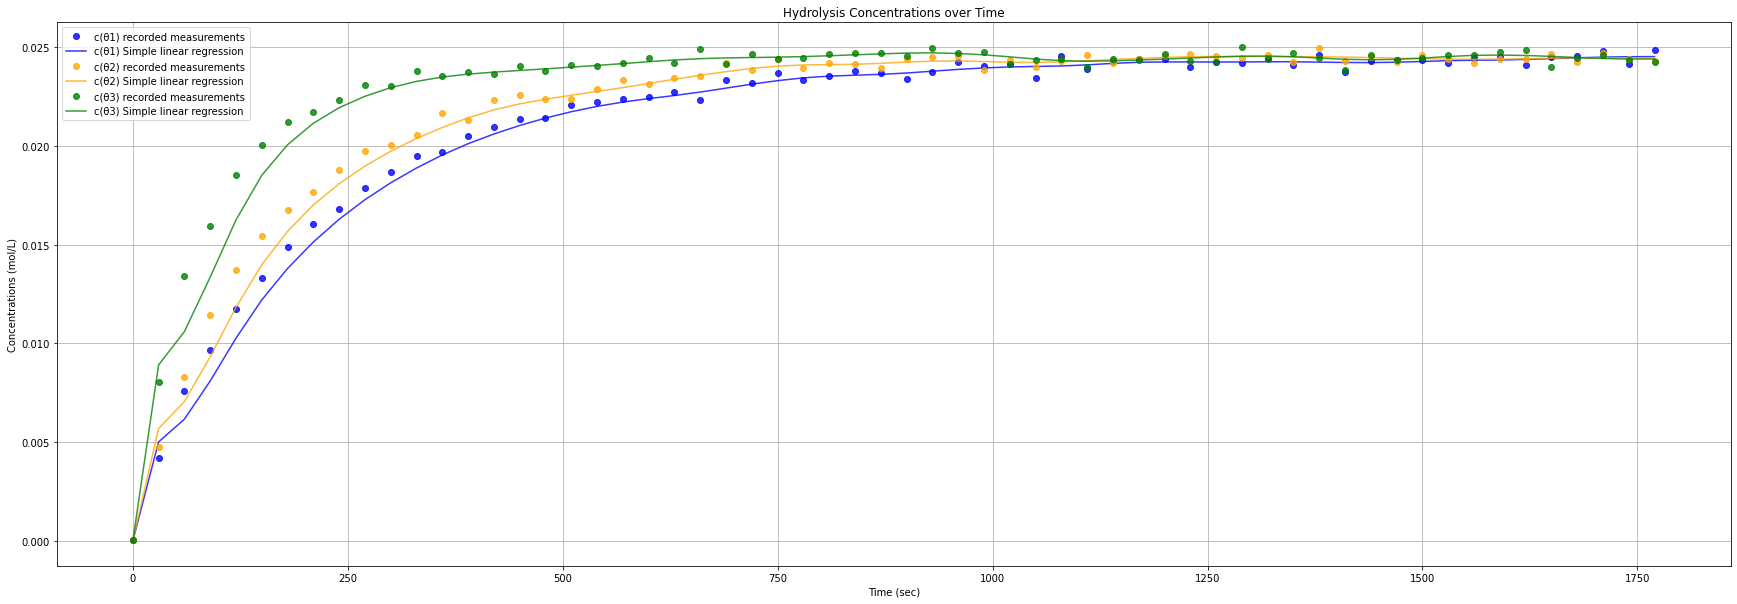

In [61]:
plt.figure(figsize=(30,10))
plt.plot(t,theta_1, 'o', alpha=0.8, color='blue', label="c(θ1) recorded measurements")
plt.plot(t,theta_1_smooth[4:64], alpha=4.8, color='blue', label="c(θ1) Simple linear regression ")
plt.plot(t,theta_2, 'o', alpha=0.8, color='orange', label="c(θ2) recorded measurements")
plt.plot(t,theta_2_smooth[4:64], alpha=4.8, color='orange', label="c(θ2) Simple linear regression ")
plt.plot(t,theta_3, 'o', alpha=0.8, color='green', label="c(θ3) recorded measurements")
plt.plot(t,theta_3_smooth[4:64], alpha=4.8, color='green', label="c(θ3) Simple linear regression ")
plt.legend()
plt.grid()
plt.title("Hydrolysis Concentrations over Time")
plt.ylabel("Concentrations (mol/L)")
plt.xlabel("Time (sec)")
plt.legend()
plt.savefig('plot_1.jpeg')
plt.show()

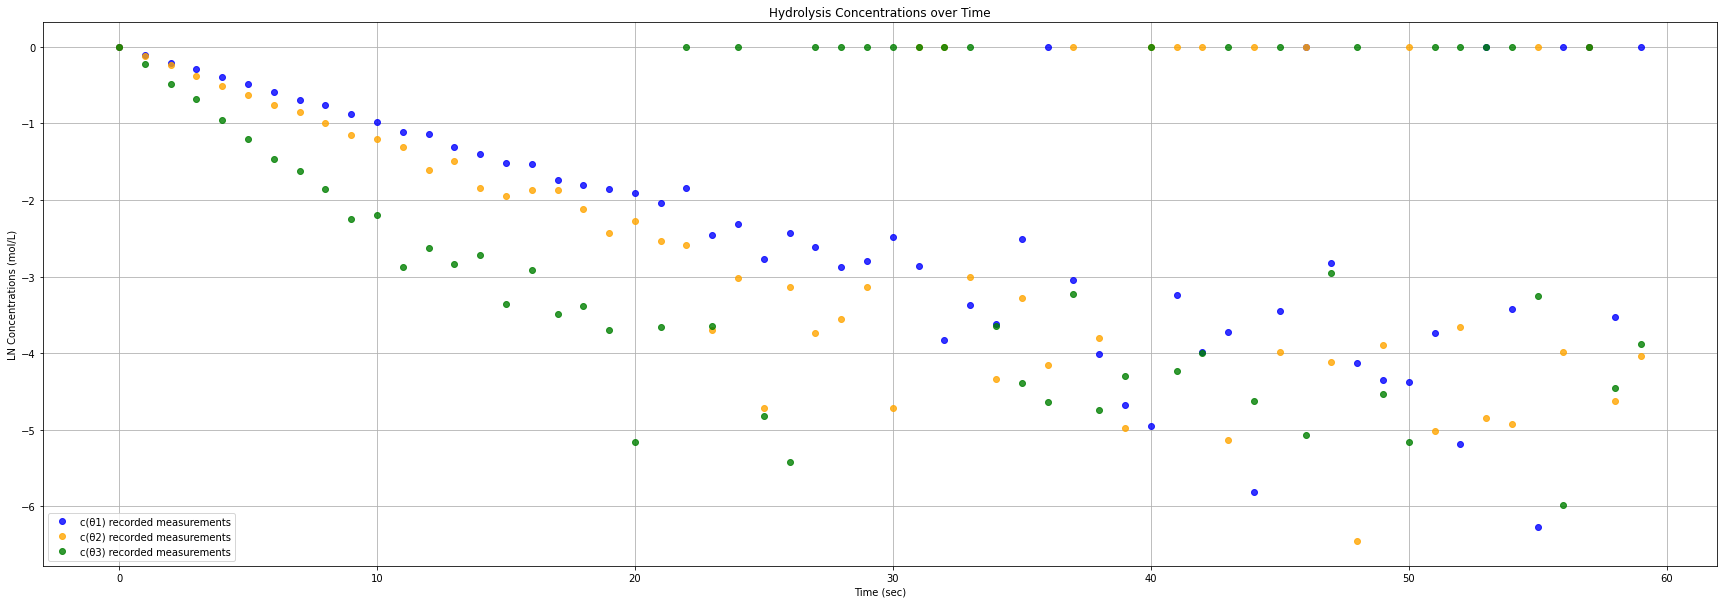

In [66]:
a = 0.0245
b = 0.051

theta_1_ln = []
theta_2_ln = []
theta_3_ln = []
for i in range(0,len(t)):
    
    x1 = (a-theta_1[i])/(b-theta_1[i])*(b/a)
    if(x1>0):
        theta_1_ln.append(math.log(x1, math.e))
    else:
        theta_1_ln.append(0)
    x2 = (a-theta_2[i])/(b-theta_2[i])*(b/a)
    if(x2>0):
        theta_2_ln.append(math.log(x2, math.e))
    else:
        theta_2_ln.append(0)    
    x3 = (a-theta_3[i])/(b-theta_3[i])*(b/a)
    if(x3>0):
        theta_3_ln.append(math.log(x3, math.e))
    else:
        theta_3_ln.append(0)        
theta_1_ln_init = np.array(theta_1_ln)
theta_2_ln_init = np.array(theta_2_ln)
theta_3_ln_init = np.array(theta_3_ln)


plt.figure(figsize=(30,10))
plt.plot(theta_1_ln_init, 'o', alpha=0.8, color='blue', label="c(θ1) recorded measurements")
plt.plot(theta_2_ln_init, 'o', alpha=0.8, color='orange', label="c(θ2) recorded measurements")
plt.plot(theta_3_ln_init, 'o', alpha=0.8, color='green', label="c(θ3) recorded measurements")
plt.legend()
plt.grid()
plt.title("Hydrolysis Concentrations over Time")
plt.ylabel("LN Concentrations (mol/L)")
plt.xlabel("Time (sec)")
plt.legend()
plt.savefig('plot_2.jpeg')
plt.show()

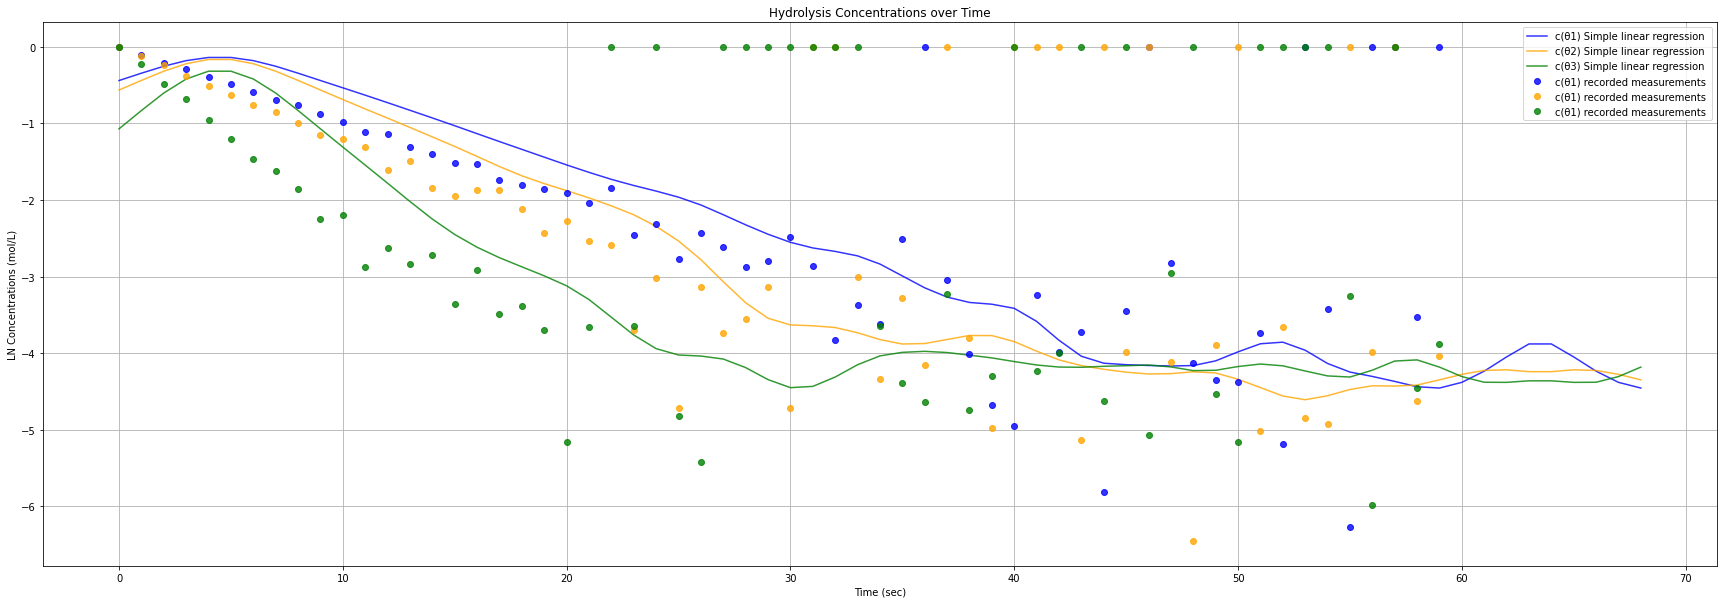

In [67]:
a = 0.0245
b = 0.051

theta_1_ln = []
theta_2_ln = []
theta_3_ln = []
for i in range(0,len(t)):
    
    x1 = (a-theta_1[i])/(b-theta_1[i])*(b/a)
    if(x1>0):
        theta_1_ln.append(math.log(x1, math.e))
    else:
        theta_1_ln.append(-4)
    x2 = (a-theta_2[i])/(b-theta_2[i])*(b/a)
    if(x2>0):
        theta_2_ln.append(math.log(x2, math.e))
    else:
        theta_2_ln.append(-4)    
    x3 = (a-theta_3[i])/(b-theta_3[i])*(b/a)
    if(x3>0):
        theta_3_ln.append(math.log(x3, math.e))
    else:
        theta_3_ln.append(-4)        
theta_1_ln = np.array(theta_1_ln)
theta_2_ln = np.array(theta_2_ln)
theta_3_ln = np.array(theta_3_ln)


theta_1_ln_smooth = Smooth_Graph(theta_1_ln)
theta_2_ln_smooth = Smooth_Graph(theta_2_ln)
theta_3_ln_smooth = Smooth_Graph(theta_3_ln)


plt.figure(figsize=(30,10))
plt.plot(theta_1_ln_smooth, alpha=0.8, color='blue', label="c(θ1) Simple linear regression")
plt.plot(theta_2_ln_smooth, alpha=0.8, color='orange', label="c(θ2) Simple linear regression")
plt.plot(theta_3_ln_smooth, alpha=0.8, color='green', label="c(θ3) Simple linear regression ")

plt.plot(theta_1_ln_init, 'o', alpha=0.8, color='blue', label="c(θ1) recorded measurements")
plt.plot(theta_2_ln_init, 'o', alpha=0.8, color='orange', label="c(θ1) recorded measurements")
plt.plot(theta_3_ln_init, 'o', alpha=0.8, color='green', label="c(θ1) recorded measurements")


plt.legend()
plt.grid()
plt.title("Hydrolysis Concentrations over Time")
plt.ylabel("LN Concentrations (mol/L)")
plt.xlabel("Time (sec)")
plt.legend()
plt.savefig('plot_3.jpeg')
plt.show()

In [69]:
x1 = 10
x2 = 30
y1 = theta_1_ln_smooth[x1]
y2 = theta_1_ln_smooth[x2]
l1 = (y2-y1)/(x2-x1)
print(l1)

y1 = theta_2_ln_smooth[x1]
y2 = theta_2_ln_smooth[x2]
l2 = (y2-y1)/(x2-x1)
print(l2)

y1 = theta_3_ln_smooth[x1]
y2 = theta_3_ln_smooth[x2]
l3 = (y2-y1)/(x2-x1)
print(l3)

-0.10092886193247133
-0.14726560811963668
-0.15716773801624645


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


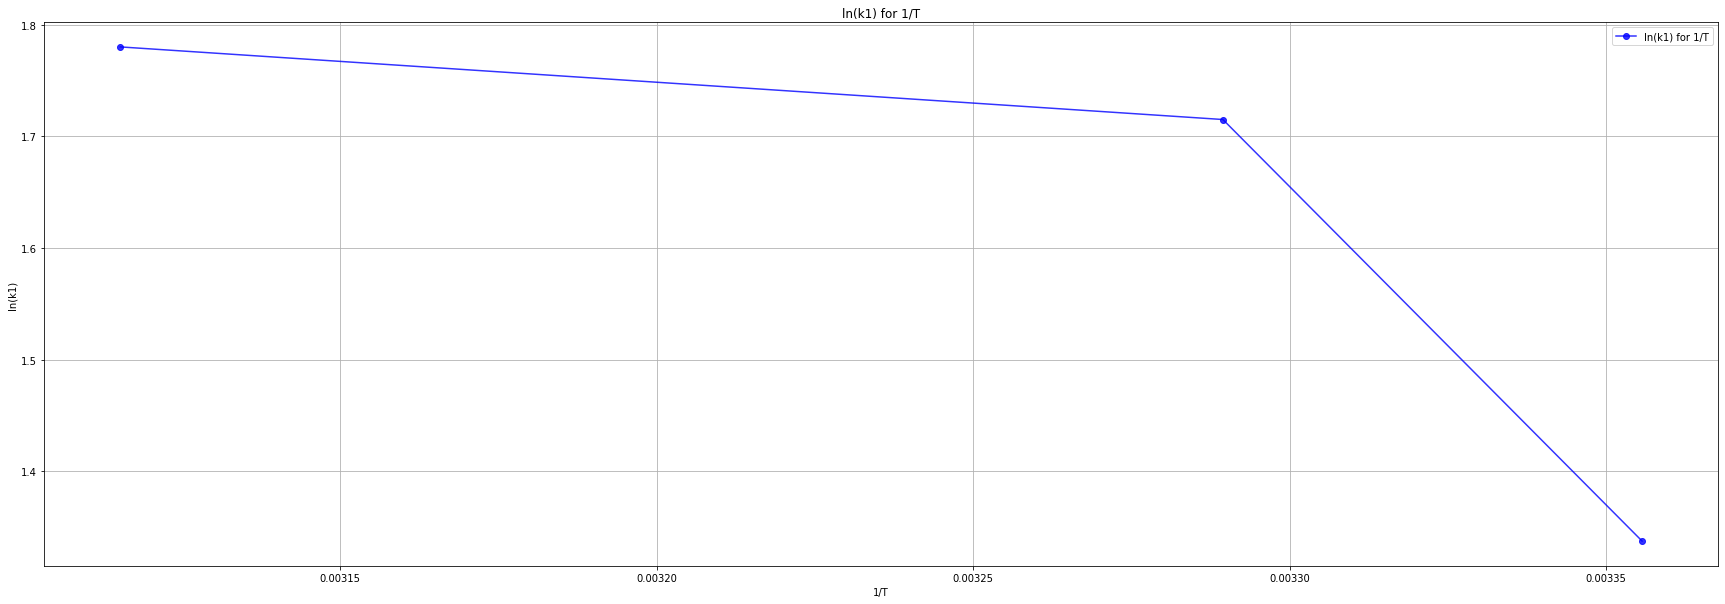

In [72]:
k1 = l1/(a-b)
k2 = l2/(a-b)
k3 = l3/(a-b)

k1_ln = math.log(k1, math.e)
k2_ln = math.log(k2, math.e)
k3_ln = math.log(k3, math.e)

t1 = 1/298
t2 = 1/304
t3 = 1/321

x_axis = [t1,t2,t3]
y_axis = [k1_ln,k2_ln,k3_ln]
         
plt.figure(figsize=(30,10))
plt.plot(x_axis,y_axis, Marker='o',alpha=0.8, color='blue', label="ln(k1) for 1/T")
plt.legend()
plt.grid()
plt.title("ln(k1) for 1/T")
plt.ylabel("ln(k1)")
plt.xlabel("1/T")
plt.legend()
plt.savefig('plot_4.jpeg')
plt.show()

In [76]:
print((k2_ln-k1_ln)/(t2-t1))
print((k3_ln-k2_ln)/(t3-t2))

print(1/(t2-t1))

-5704.606670099467
-373.55049405875656
-15098.666666666642
